In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_train.shape

(891, 12)

In [4]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## EDA

3    491
1    216
2    184
Name: Pclass, dtype: int64


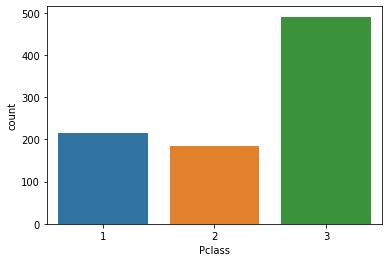

In [7]:
#Pclass
print(data_train.Pclass.value_counts())
sns.countplot(x = data_train.Pclass)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


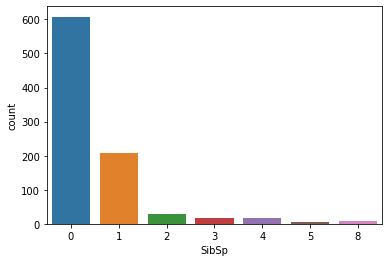

In [8]:
#SibSp
print(data_train.SibSp.value_counts())
sns.countplot(x = data_train.SibSp)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


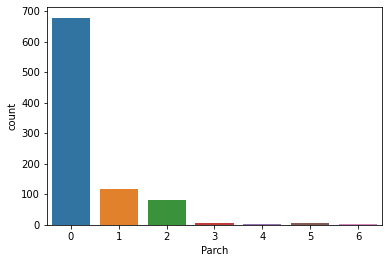

In [9]:
#Parch
print(data_train.Parch.value_counts())
sns.countplot(x = data_train.Parch)

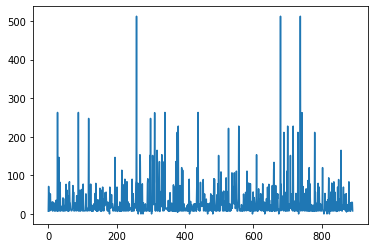

In [14]:
# Fare
plt.plot(data_train.Fare)

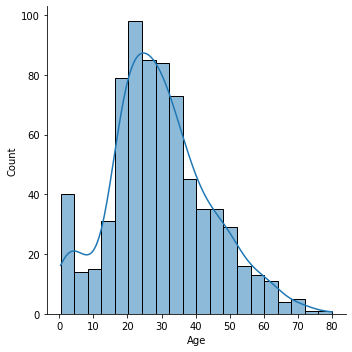

In [15]:
# Age
sns.displot(x = data_train.Age, kde = True)

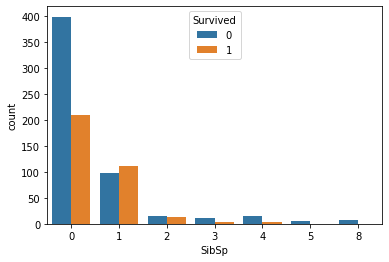

In [16]:
#SibSp
sns.countplot(x = data_train.SibSp, hue = data_train.Survived)

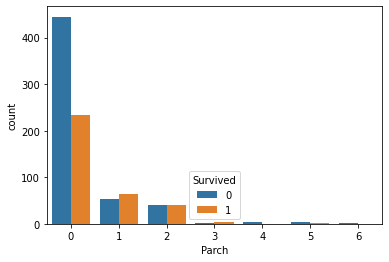

In [17]:
#Parch
sns.countplot(x = data_train.Parch, hue = data_train.Survived)

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64


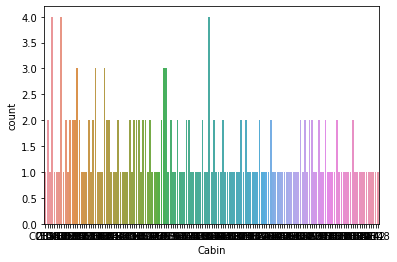

In [25]:
# cabin
print(data_train.Cabin.value_counts())
sns.countplot(x = data_train.Cabin)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


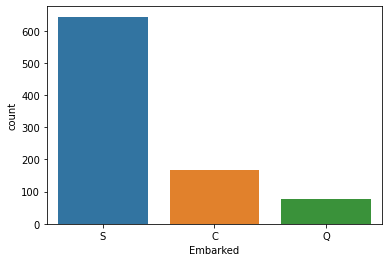

In [26]:
# Embarked
print(data_train.Embarked.value_counts())
sns.countplot(x = data_train.Embarked)

## Feature Engineering

In [22]:
data_train.Age.replace(np .nan, data_train.Age.mean(), inplace = True)

In [23]:
data_train.Age.isnull().sum()

0

In [24]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [28]:
data_train.drop(['PassengerId', 'Ticket'], axis = 1, inplace = True)

In [29]:
data_train.drop('Cabin', axis = 1, inplace = True)

In [31]:
data_test.Age.replace(np .nan, data_test.Age.mean(), inplace = True)
data_test.drop(['PassengerId', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [32]:
data_train.Embarked.replace(('S','C','Q'), (1,2,3), inplace = True)
data_test.Embarked.replace(('S','C','Q'), (1,2,3), inplace = True)

In [33]:
data_train.Parch.replace((2,3,4,5,6), (1,1,1,1,1), inplace = True)
data_test.Parch.replace((2,3,4,5,6), (1,1,1,1,1), inplace = True)


In [34]:
data_train.SibSp.replace((2,3,4,5), (1,1,1,1), inplace = True)
data_test.SibSp.replace((2,3,4,5), (1,1,1,1), inplace = True)

In [35]:
data_train.Sex.replace(('male','female'), (0,1), inplace = True)
data_test.Sex.replace(('male','female'), (0,1), inplace = True)

In [36]:
data_test.drop('Name', axis = 1, inplace = True)
data_train.drop('Name', axis = 1, inplace = True)

In [46]:
data_train.Embarked.replace(np.nan, 3, inplace = True)
data_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [47]:
X = data_train.drop('Survived', axis = 1)
Y = data_train.Survived

In [48]:
from sklearn.model_selection import train_test_split
xtrain,xval,ytrain,yval = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [49]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Model Building

In [50]:
from sklearn.ensemble import RandomForestClassifier
model_random = RandomForestClassifier()
model_random.fit(xtrain,ytrain)

RandomForestClassifier()

In [51]:
model_random.score(xval,yval)

0.8547486033519553

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
ypred = model_random.predict(xval)
accuracy_score(ypred, yval)

0.8547486033519553

[[101  17]
 [  9  52]]


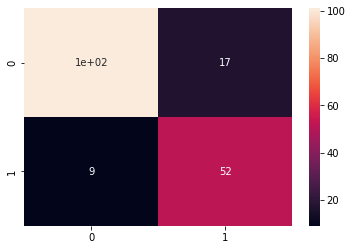

In [55]:
matrix = confusion_matrix(ypred,yval)
print(matrix)
sns.heatmap(matrix, annot = True)

In [60]:
acc = []

for i in range(80,86):
  model = RandomForestClassifier(n_estimators= i)
  model.fit(xtrain,ytrain)
  acc.append(model.score(xval,yval))
  print("Epoch: ", i)

Epoch:  80
Epoch:  81
Epoch:  82
Epoch:  83
Epoch:  84
Epoch:  85


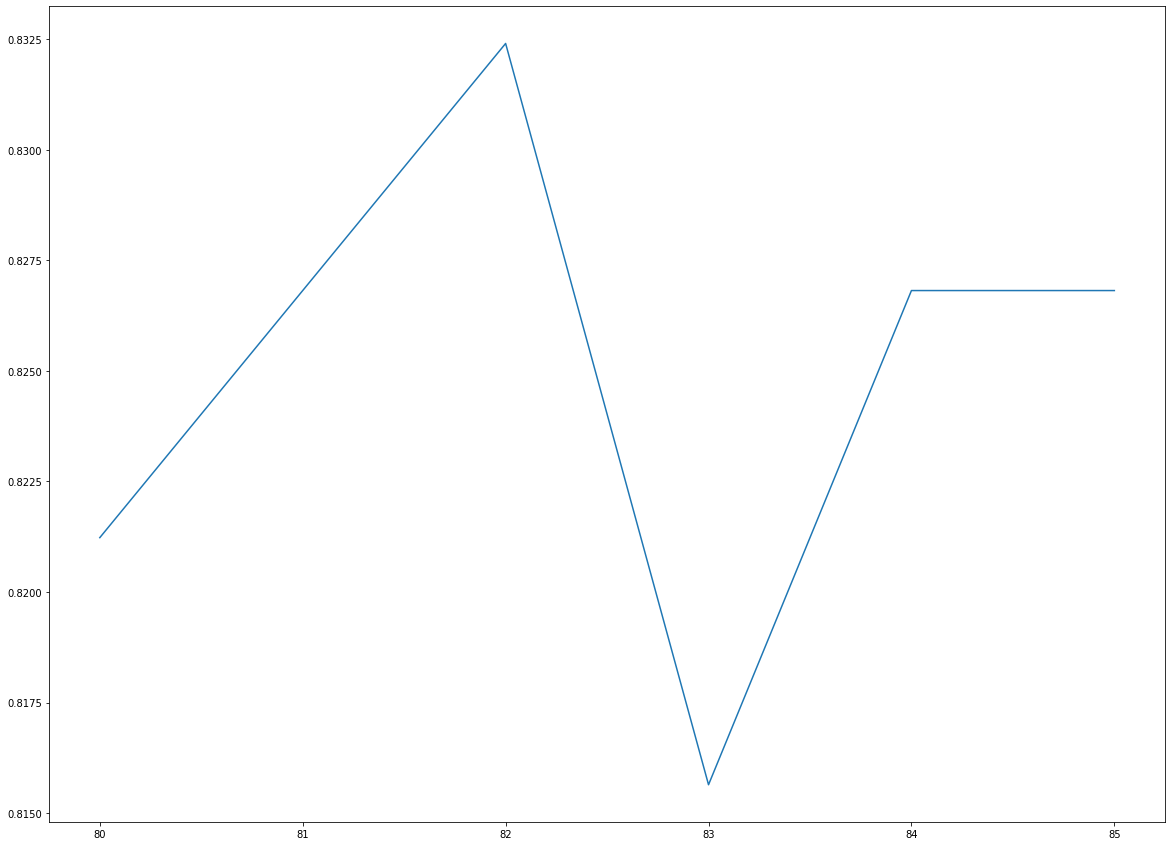

In [61]:
plt.plot(range(80, 86), acc)

In [62]:
data_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [63]:
data_test.Fare.replace(np.nan, data_test.Fare.mean(), inplace = True)

In [64]:
y_real = model_random.predict(data_test)

In [66]:
y_real = pd.DataFrame(y_real)

In [68]:
new_data = pd.read_csv('test.csv')
new_data = pd.DataFrame(new_data.PassengerId)

In [74]:
y_real.to_csv('file1.csv')

In [75]:
from sklearn.metrics import precision_score, f1_score
ypred = model_random.predict(xval)
print("Precision Score: ", precision_score(ypred, yval))
print("F1 Score: ", f1_score(ypred,yval))

Precision Score:  0.7536231884057971
F1 Score:  0.8
